### Plot data to check

In [204]:
import sys
sys.path.append('../code')

import xarray as xr
import pylab as pl
from IPython import display

import func_misc as misc

In [183]:
data_dir = '../outputs/'

### Results of rcp85, percentile 95 ###
Weighted average mean values in 2020
13.299757111250472


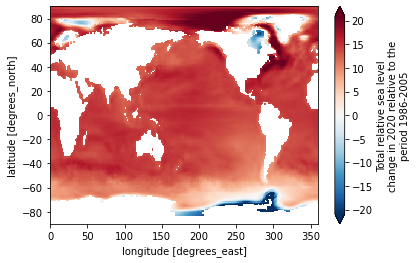

Weighted average mean values in 2120
192.08828691469776


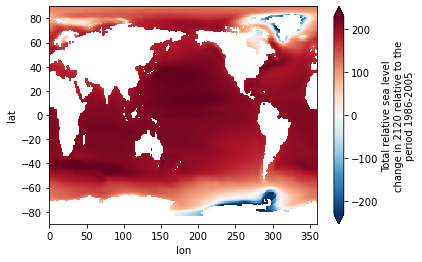

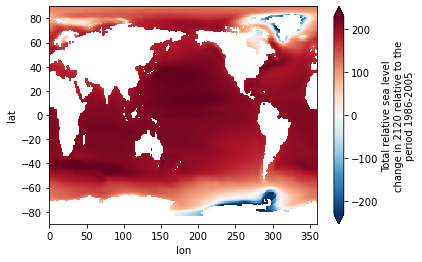

In [192]:
for SCE in ['rcp85']:
    for Perc in ['95']:
        print(f'### Results of {SCE}, percentile {Perc} ###')

        for year in [2020, 2120]:
            ds = xr.open_dataset(f'{data_dir}SeaLevelMap_CMIP5_glo_LEV20_{SCE}_Perc{Perc}_{year}.nc')
            print(f'Weighted average mean values in {year}')
            print(ds.area_weighted_mean.values.item())
            pl.clf()
            ds.TotalSL.plot(robust=True)
            display.display(pl.gcf())

### Check the time extention of ocean dynamics for the North Sea

In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [172]:
Year = 2120

In [175]:
### Ocean dynamics effects
DIR_CDE  = '/Users/dewilebars/Projects/Project_ProbSLR/CMIP_SeaLevel/outputs/'
fcde     = xr.open_mfdataset(f'{DIR_CDE}cmip5_zos_{SCE}/*_zos_{SCE}*')
CDE_mean = fcde.CorrectedReggrided_zos.mean(dim='model') #.sel(time=Year+0.5)

if Year > 2100.5:
    new_time = xr.DataArray( np.arange(2006, Year+0.5), dims='time', 
                coords=[np.arange(2006,Year+0.5)], name='time' )
    fit_coeff = CDE_mean.polyfit('time', 2)
    CDE_mean = xr.polyval(coord=new_time, coeffs=fit_coeff.polyfit_coefficients)

In [179]:
CDE_mean_orig = fcde.CorrectedReggrided_zos.mean(dim='model') #.sel(time=Year+0.5)

In [176]:
CDE_mean

<xarray.DataArray (time: 115, lat: 180, lon: 360)>
dask.array<sum-aggregate, shape=(115, 180, 360), dtype=float64, chunksize=(115, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 2.006e+03 2.007e+03 2.008e+03 ... 2.119e+03 2.12e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


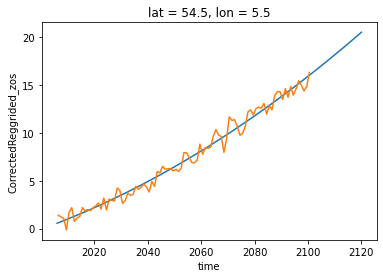

In [180]:
CDE_mean.sel(lon=5.5, lat=54.5).plot()
CDE_mean_orig.sel(lon=5.5, lat=54.5).plot()

### Select data for the North Sea for PROTECT partners

In [226]:
ds_2120 = xr.open_dataset(f'{data_dir}SeaLevelMap_CMIP5_glo_LEV20_{SCE}_Perc95_2120.nc')
ds_2020 = xr.open_dataset(f'{data_dir}SeaLevelMap_CMIP5_glo_LEV20_{SCE}_Perc95_2020.nc')

ds_diff = misc.rotate_longitude(ds_2120.TotalSL - ds_2020.TotalSL, 'lon')

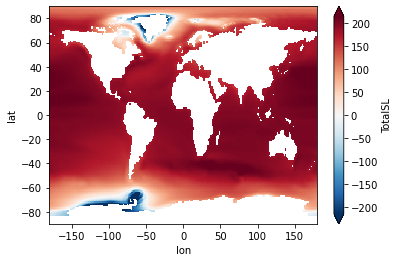

In [227]:
ds_diff.plot(robust=True)

In [228]:
ds_diff_NS = ds_diff.sel(lat=slice(36,62), lon=slice(-13,12))

In [232]:
##### Export outputs as a NetCDF file
ds_diff_NS.attrs['source_file'] = 'This NetCDF file was built from CheckMapData.pynb'
ds_diff_NS.attrs['creation_date'] = datetime.now().strftime('%Y-%m-%d %H:%M')

NameOutput = '../outputs/SeaLevelMap_Europe_rcp85_Perc95_2020_2120.nc'
if os.path.isfile(NameOutput):
    os.remove(NameOutput)
ds_diff_NS.to_netcdf(NameOutput)


In [233]:
ds = xr.open_dataset(NameOutput)

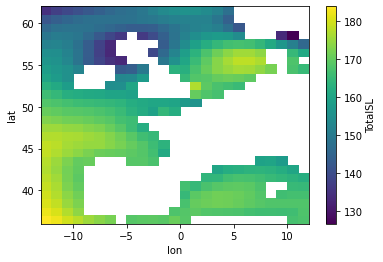

In [235]:
ds.TotalSL.plot()
